# Práctica M33

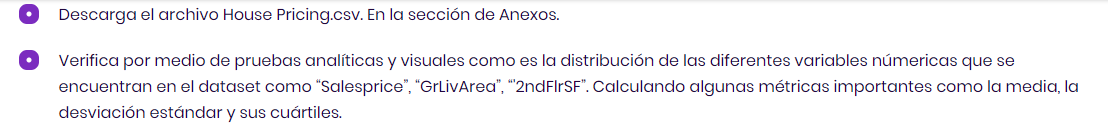

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import (kstest, shapiro, normaltest, jarque_bera, cramervonmises, anderson, chisquare)
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import (norm, uniform, triang, expon, arcsine, gamma)
from collections import namedtuple
from tabulate import tabulate
import scipy.stats as stats

In [27]:
df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M33 DS/House Pricing.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
# verificamos valores nulos
print('valores nulos por columna')
print(df.isnull().sum())

# valores infinitos
print('\nvalores infinitos por columna')
print(df.replace([np.inf, -np.inf], np.nan).isnull().sum())

valores nulos por columna
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

valores infinitos por columna
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [30]:
df.dropna(axis=1, inplace = True)

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [51]:
# Seleccionar todas las columnas numéricas
columns_num = df.select_dtypes(include = [np.number]).columns.tolist()

In [52]:
# calcular Metricas
df[columns_num].describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


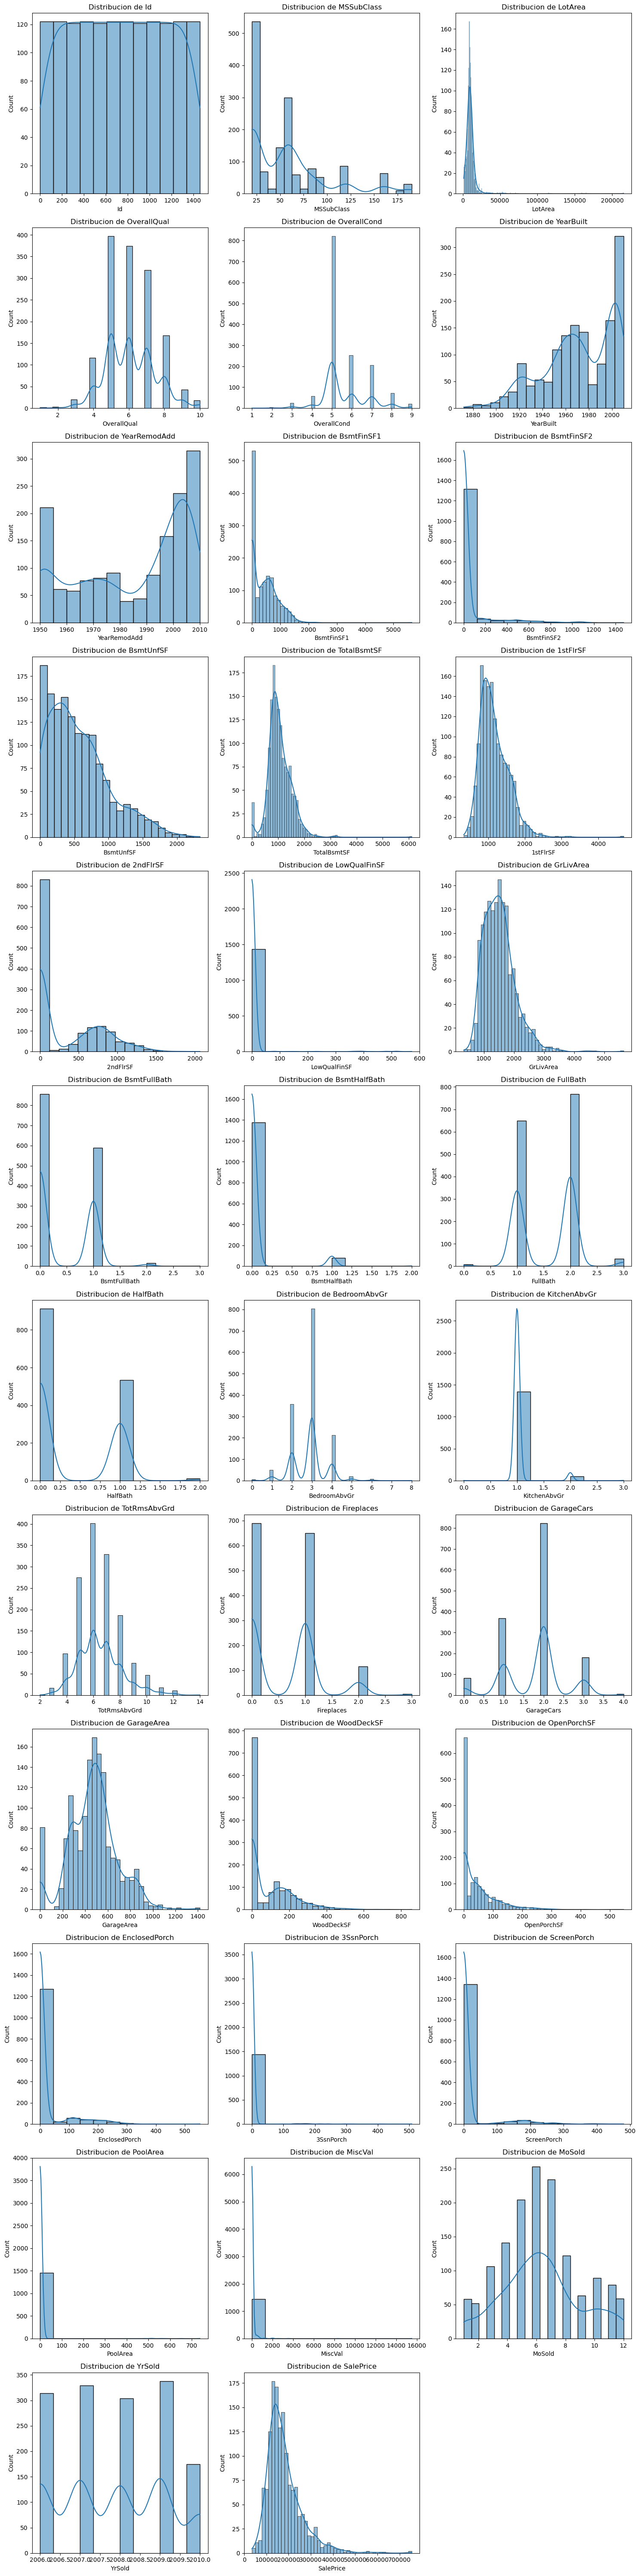

In [54]:
# cantidad de variables numericas
num_vars = len(columns_num)

# Ajustar el tamaño de la cuadrícula de subplots
nrows = (num_vars // 3) + (1 if num_vars % 3 !=0 else 0)

# visualizacion de la distribucion
plt.figure(figsize = (15,5 * nrows))
for i, var in enumerate(columns_num):
    plt.subplot(nrows, 3, i+1)
    sns.histplot(df[var], kde = True)
    plt.title(f'Distribucion de {var}')
plt.tight_layout()
plt.show()

In [55]:
# calculamos la correlacion
correlacion_var = df[columns_num].corr()
correlacion_var

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


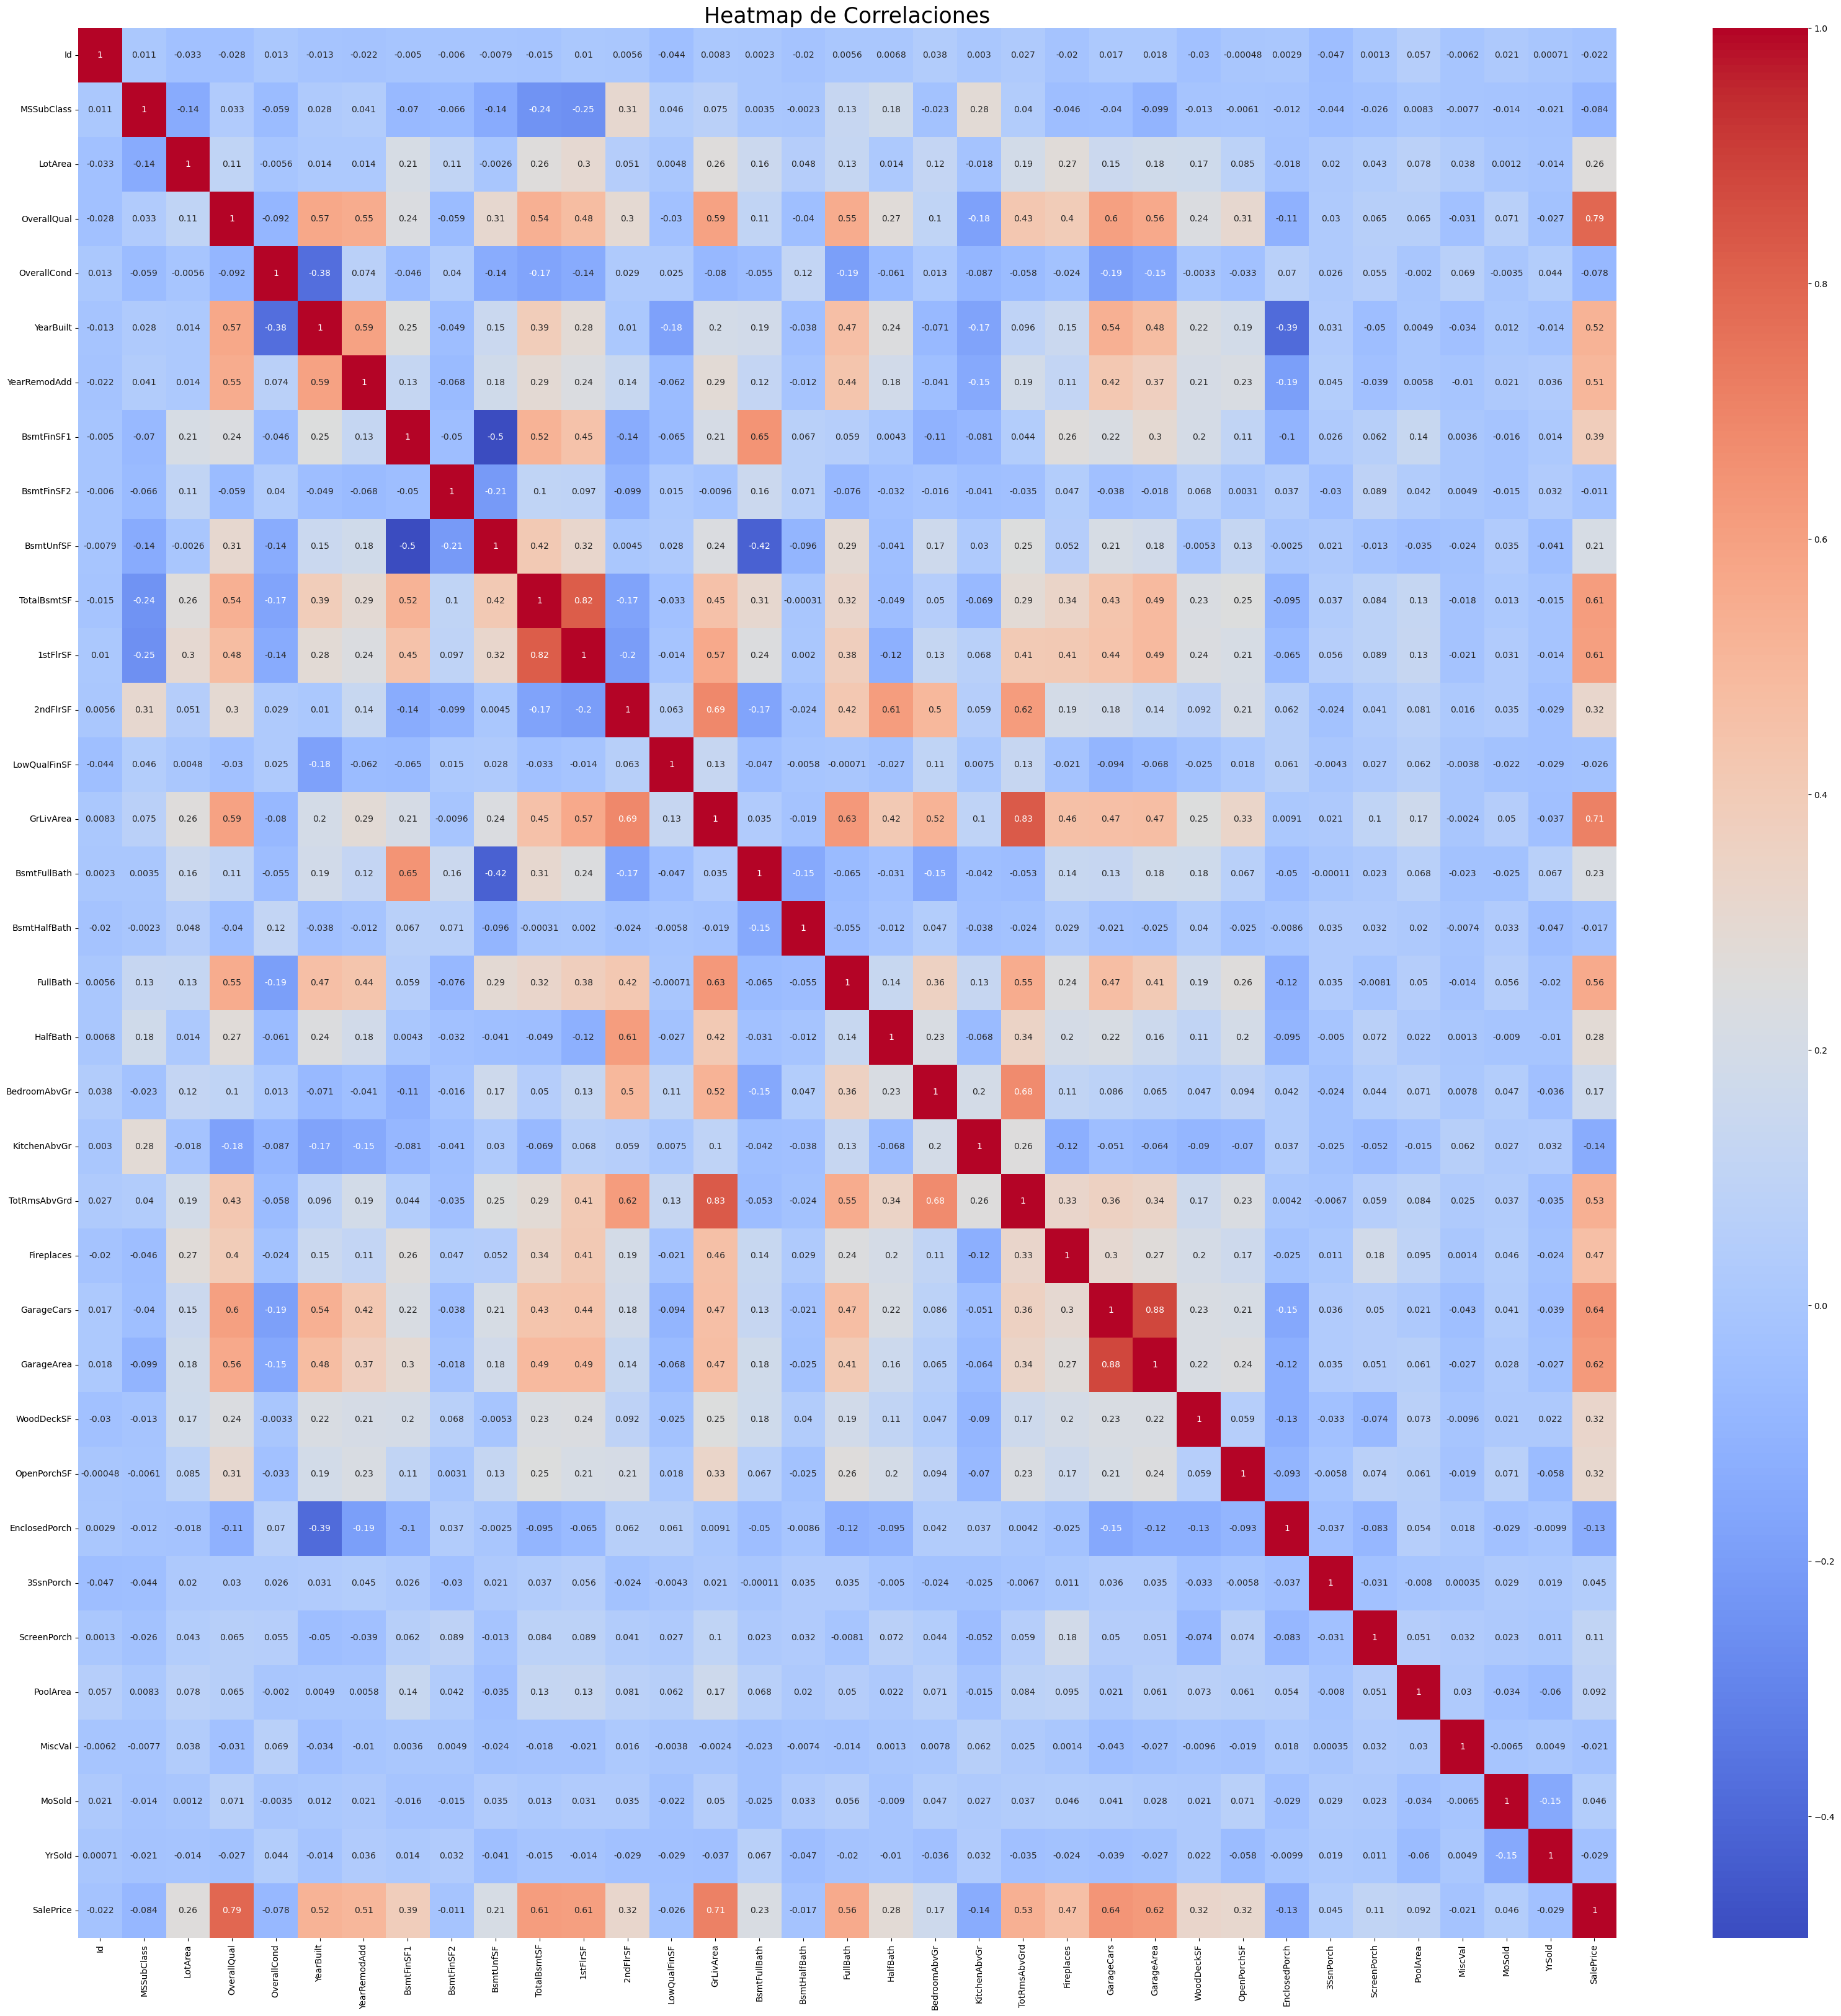

In [60]:
# visualizacion de la correlacion
plt.figure(figsize = (40,40))
sns.heatmap(correlacion_var, annot = True, cmap = 'coolwarm')
plt.title('Heatmap de Correlaciones', fontsize = 25)
plt.show()

In [61]:
# modelo de regresion
import statsmodels.api as sm

In [65]:
X = df[columns_num].drop(columns = ['SalePrice'])
y = sm.add_constant(X)

y = df['SalePrice']

# Modelo OLS
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1401.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:57:58   Log-Likelihood:                         -17336.
No. Observations:                1460   AIC:                                  3.474e+04
Df Residuals:                    1428   BIC:                                  3.490e+04
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [66]:
# Multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculamos vif
vif= pd.DataFrame()
vif['columns_num'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


      columns_num           VIF
0              Id  4.093562e+00
1      MSSubClass  4.166084e+00
2         LotArea  2.574952e+00
3     OverallQual  6.619549e+01
4     OverallCond  4.086755e+01
5       YearBuilt  1.713675e+04
6    YearRemodAdd  2.054789e+04
7      BsmtFinSF1           inf
8      BsmtFinSF2           inf
9       BsmtUnfSF           inf
10    TotalBsmtSF           inf
11       1stFlrSF           inf
12       2ndFlrSF           inf
13   LowQualFinSF           inf
14      GrLivArea           inf
15   BsmtFullBath  3.679366e+00
16   BsmtHalfBath  1.216156e+00
17       FullBath  2.624655e+01
18       HalfBath  3.415238e+00
19   BedroomAbvGr  3.080033e+01
20   KitchenAbvGr  3.737806e+01
21   TotRmsAbvGrd  8.338634e+01
22     Fireplaces  2.979583e+00
23     GarageCars  3.621894e+01
24     GarageArea  3.056807e+01
25     WoodDeckSF  1.883712e+00
26    OpenPorchSF  1.812919e+00
27  EnclosedPorch  1.444722e+00
28      3SsnPorch  1.037095e+00
29    ScreenPorch  1.188882e+00
30      

In [67]:
# Variables a eliminar
variables_a_excluir = [
    'Id', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath',
    'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold'
]

# Crear el modelo final excluyendo las variables no significativas
X_final = X.drop(columns=variables_a_excluir)

# Volver a entrenar el modelo con las variables restantes
model_final = sm.OLS(y, X_final).fit()

# Imprimir el resumen del modelo final
print(model_final.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2049.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):                        0.00
Time:                        14:08:05   Log-Likelihood:                         -17337.
No. Observations:                1460   AIC:                                  3.472e+04
Df Residuals:                    1438   BIC:                                  3.483e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [68]:
from sklearn.metrics import mean_squared_error

# evaluar el modelo
y_pred = model_final.predict(X_final)
mse = mean_squared_error(y, y_pred)
r_squared = model_final.rsquared

print(f'Error Cuadratico Medio (MSE): {mse}')
print(f'R Cuadrada: {r_squared}')

Error Cuadratico Medio (MSE): 1207033352.3596303
R Cuadrada: 0.9690815575385517


# Precisión del Modelo
 * 96% lo que suguiere un modelo con predicciones de confianza.